Сбор и разметка данных (семинары)
Инструменты разметки наборов данных

1. Выполнение работы продолжу на очищенном и преобразованном, в рамках предыдущего задания, дата сете 'cleaned_house_prices.csv'. 
Датасет содержит данные о годе постройки домов, требующие разметки для распознавания периода строительства дома.

В ходе работы были созданы следующие файлы csv:
- subset_avto
- subset_manual
- projectYearBuilt

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # для преобразования текста в вектор
from sklearn.linear_model import LogisticRegression # использование модели логистической регрессии
from sklearn.metrics import accuracy_score, classification_report # оценка производительности модели
from sklearn.pipeline import Pipeline # конвеер обработки данных
import matplotlib.pyplot as plt


In [2]:
# Считываем дата фрейм
df = pd.read_csv('cleaned_house_prices.csv')

In [7]:
# Выведем названия всех столбцов
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',

In [22]:
# Для удобства работы выберем только основные столбцы из DataFrame и перезапишем в новый
selected_columns = ['Id', 'MSSubClass', 'LotArea', 'Utilities', 'Neighborhood', 'BldgType',
                    'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GarageType', 'MoSold', 'PoolArea',
                    'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
df_selected = df[selected_columns]

In [25]:
# Выведем на просмотр
df_selected.head(10)

,Id,MSSubClass,LotArea,Utilities,Neighborhood,BldgType,OverallCond,YearBuilt,TotalBsmtSF,GarageType,MoSold,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,8450,AllPub,CollgCr,1Fam,5,2003,856,Attchd,2,0,2008,WD,Normal,208500
1,2,20,9600,AllPub,Veenker,1Fam,8,1976,1262,Attchd,5,0,2007,WD,Normal,181500
2,3,60,11250,AllPub,CollgCr,1Fam,5,2001,920,Attchd,9,0,2008,WD,Normal,223500
3,4,70,9550,AllPub,Crawfor,1Fam,5,1915,756,Detchd,2,0,2006,WD,Abnorml,140000
4,5,60,14260,AllPub,NoRidge,1Fam,5,2000,1145,Attchd,12,0,2008,WD,Normal,250000
5,6,50,14115,AllPub,Mitchel,1Fam,5,1993,796,Attchd,10,0,2009,WD,Normal,143000
6,7,20,10084,AllPub,Somerst,1Fam,5,2004,1686,Attchd,8,0,2007,WD,Normal,307000
7,8,60,10382,AllPub,NWAmes,1Fam,6,1973,1107,Attchd,11,0,2009,WD,Normal,200000
8,9,50,6120,AllPub,OldTown,1Fam,5,1931,952,Detchd,4,0,2008,WD,Abnorml,129900
9,10,190,7420,AllPub,BrkSide,2fmCon,6,1939,991,Attchd,1,0,2008,WD,Normal,118000


In [26]:
# Проверим уникальные значения в столбце YearBuilt (год постройки дома)
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917, 1872,
       1905], dtype=int64)

In [27]:
# Посмотрим на описание значений в столбце
df['YearBuilt'].describe()

count    1455.00000
mean     1971.22268
std        30.12596
min      1872.00000
25%      1954.00000
50%      1972.00000
75%      2000.00000
max      2010.00000
Name: YearBuilt, dtype: float64

2. Выполним разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. 

In [64]:
# Создаем случайную подвыборку (подмножество) из исходного DF
subset = df_selected.sample(frac=0.02)
subset.to_csv("subset_avto.csv", index=False)

In [65]:
# Считываем дата фрейм
df = pd.read_csv('subset_avto.csv')

In [66]:
# Набор правил и условий, которые позволят автоматически присваивать метки данным:
df.loc[df['YearBuilt'] >= 2000, 'Status'] = "New"
df.loc[(df['YearBuilt'] < 2000) & (df['YearBuilt'] > 1970), 'Status'] = "Medium"
df.loc[df['YearBuilt'] <= 1970, 'Status'] = "Old"

In [67]:
# Выведем на просмотр
df.head(10)

,Id,MSSubClass,LotArea,Utilities,Neighborhood,BldgType,OverallCond,YearBuilt,TotalBsmtSF,GarageType,MoSold,PoolArea,YrSold,SaleType,SaleCondition,SalePrice,Status
0,480,30,5925,AllPub,OldTown,1Fam,7,1937,907,Detchd,3,0,2007,WD,Alloca,89471,Old
1,558,50,11040,AllPub,IDOTRR,1Fam,6,1920,637,CarPort,9,0,2006,COD,Normal,108000,Old
2,961,20,7207,AllPub,BrkSide,1Fam,7,1958,858,Attchd,2,0,2010,WD,Normal,116500,Old
3,51,60,13869,AllPub,Gilbert,1Fam,6,1997,794,Attchd,7,0,2007,WD,Normal,177000,Medium
4,574,80,9967,AllPub,Gilbert,1Fam,5,2000,384,BuiltIn,12,0,2007,WD,Normal,170000,New
5,108,20,6000,AllPub,OldTown,1Fam,5,1948,789,Detchd,4,0,2008,WD,Partial,115000,Old
6,1182,120,5587,AllPub,Crawfor,TwnhsE,5,2008,1600,Attchd,11,0,2008,New,Partial,392500,New
7,233,160,1680,AllPub,BrDale,Twnhs,5,1972,483,Attchd,6,0,2006,WD,Normal,94500,Medium
8,1218,20,8640,AllPub,Somerst,1Fam,5,2009,1300,Attchd,9,0,2009,New,Partial,229456,New
9,1111,60,8000,AllPub,Gilbert,1Fam,5,1995,773,Attchd,6,0,2008,WD,Normal,188000,Medium


In [69]:
# Проверим все ли дома были размечены по статусу относительно года постройки
df['Status'].value_counts()

Status
Old       13
Medium     8
New        8
Name: count, dtype: int64

3. Выполним разметку отдельного подмножества выбранного датасета вручную с помощью инструмента разметки Label Studio

In [52]:
# Создаем случайную подвыборку (подмножество) из исходного DF
subset = df_selected.sample(frac=0.013)
subset.to_csv("subset_manual.csv", index=False)

В терминале  через команду label-studio переходим в веб-браузер (по умолчанию автоматически откроется на локальном хосте http://localhost:8080) =>
создаем проект (Create project) YearBuilt =>
Определяем задачи разметки, приступаем к разметке текстовых данных  =>
Экспортируем размеченные данные через Export в формате экспорта CSV => 

В папке файл projectYearBuilt, созданный столбец разметки Sentiment

4. Объединим данные подмножества, размеченные вручную, с данными подмножества, 
размеченными на основе правил (df) в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [78]:
# Загрузка данных из файла, созданного в label-studio
project = pd.read_csv('projectYearBuilt.csv')

In [79]:
# Переименование столбцов для совпадения
df.rename(columns={'Status': 'Markup'}, inplace=True)
project.rename(columns={'sentiment': 'Markup'}, inplace=True)

In [84]:
result = pd.concat([df, project])
result.head()

,Id,MSSubClass,LotArea,Utilities,Neighborhood,BldgType,OverallCond,YearBuilt,TotalBsmtSF,GarageType,...,SaleType,SaleCondition,SalePrice,Markup,annotation_id,annotator,created_at,id,lead_time,updated_at
0,480,30,5925,AllPub,OldTown,1Fam,7,1937,907,Detchd,...,WD,Alloca,89471,Old,NaN,NaN,NaN,NaN,NaN,NaN
1,558,50,11040,AllPub,IDOTRR,1Fam,6,1920,637,CarPort,...,COD,Normal,108000,Old,NaN,NaN,NaN,NaN,NaN,NaN
2,961,20,7207,AllPub,BrkSide,1Fam,7,1958,858,Attchd,...,WD,Normal,116500,Old,NaN,NaN,NaN,NaN,NaN,NaN
3,51,60,13869,AllPub,Gilbert,1Fam,6,1997,794,Attchd,...,WD,Normal,177000,Medium,NaN,NaN,NaN,NaN,NaN,NaN
4,574,80,9967,AllPub,Gilbert,1Fam,5,2000,384,BuiltIn,...,WD,Normal,170000,New,NaN,NaN,NaN,NaN,NaN,NaN


5. Обучим модель машинного обучения, используя объединенный набор размеченных данных. 
Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [91]:
# Разделение датасета
X_train, X_test, y_train, y_test = train_test_split(
    result[['YearBuilt']].values.reshape(-1, 1),  # Преобразование в правильную форму
    result['Markup'],
    test_size=0.4,
    random_state=42
)

In [92]:
# Создание конвейера
pipeline = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))  # Модель логистической регрессии
])

In [93]:
# Обучение модели
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', LogisticRegression(max_iter=1000))])

In [96]:
# Расчет точности модели
accuracy = accuracy_score(y_test, predictions)

# Оценка качества предсказания
report = classification_report(y_test, predictions)

print(f"Точность модели: {accuracy}")
print('Отчет по классификации:')
print(report)

Точность модели: 0.9
Отчет по классификации:
              precision    recall  f1-score   support

      Medium       1.00      0.60      0.75         5
         New       0.82      1.00      0.90         9
         Old       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.94      0.87      0.88        20
weighted avg       0.92      0.90      0.89        20



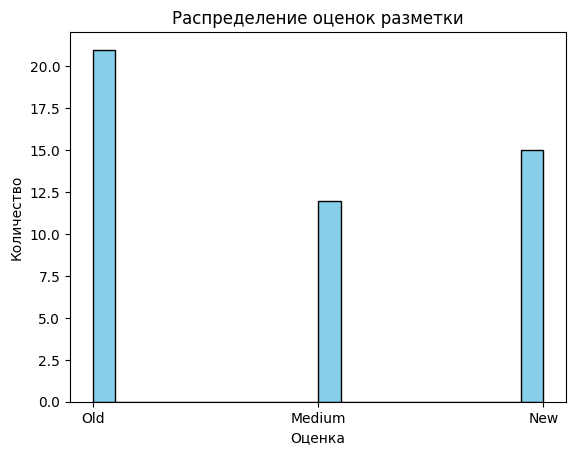

In [99]:
# Построение гистограммы для оценок разметки
plt.hist(result['Markup'], bins=20, color='skyblue', edgecolor='black')

# Добавление заголовка и меток
plt.title('Распределение оценок разметки')
plt.xlabel('Оценка')
plt.ylabel('Количество')

# Отображение гистограммы
plt.show()

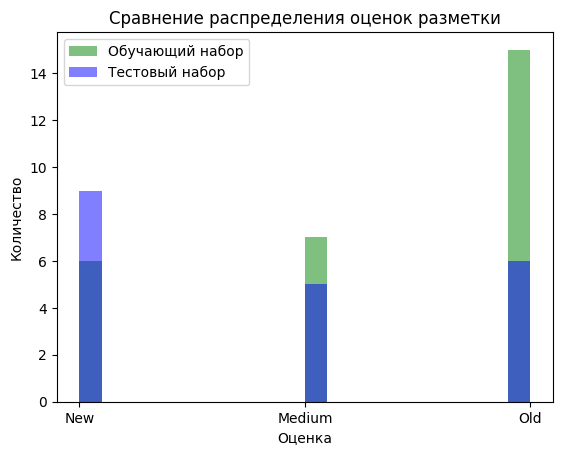

In [100]:
# Построение гистограмм для обучающего и тестового наборов
plt.hist(y_train, bins=20, color='green', alpha=0.5, label='Обучающий набор')
plt.hist(y_test, bins=20, color='blue', alpha=0.5, label='Тестовый набор')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток
plt.title('Сравнение распределения оценок разметки')
plt.xlabel('Оценка')
plt.ylabel('Количество')

# Отображение гистограммы
plt.show()

6. Оценим эффективность обученной модели на тестовом датасете метрикой f1_score.

f1_score — это метрика для оценки эффективности алгоритма классификации, является мерой точности и полноты (precision и recall).
Показатель F1 варьируется от 0 до 1, при этом более высокие показатели свидетельствуют о более высокой эффективности.

Мы получили значение 0.9. Это значит, что модель анализа настроения достигла очень высокого уровня точности в предсказании периода строительства домов. 